In [32]:

import pandas as pd
import numpy as np
import datetime as dt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
''' Statsmodels implementation '''
def CrossCorrelation(sig1, sig2, lags = 40):
    corr = sm.tsa.stattools.ccf(sig2, sig1, adjusted = False)
    return corr[0:lags+1]

def CrossCorr3DMatrix(dataFrame, lags = 40):
    n = dataFrame.shape[1]
    result = np.zeros((n, n, lags+1))
    for i in range(n):
        for j in range(n):
            result[i, j, :] = np.array(CrossCorrelation(dataFrame.iloc[:,i], dataFrame.iloc[:,j], lags))
    return result


In [34]:
#Read NO-NO2-NOx Series
dataFrame = pd.read_excel("../data/DataAirTrain.xlsx",index_col= 'time', sheet_name="DataAirTrain")
dataFrame.drop(columns=dataFrame.columns[0], axis=1, inplace=True)

In [35]:
dataFrame = dataFrame.interpolate(method='linear')

c:\Users\admin\.conda\envs\timeseries\lib\site-packages\scipy\signal\_signaltools.py:240: RuntimeWarning: Use of fft convolution on input with NAN or inf results in NAN or inf output. Consider using method='direct' instead.
  return convolve(in1, _reverse_and_conj(in2), mode, method)


<AxesSubplot:>

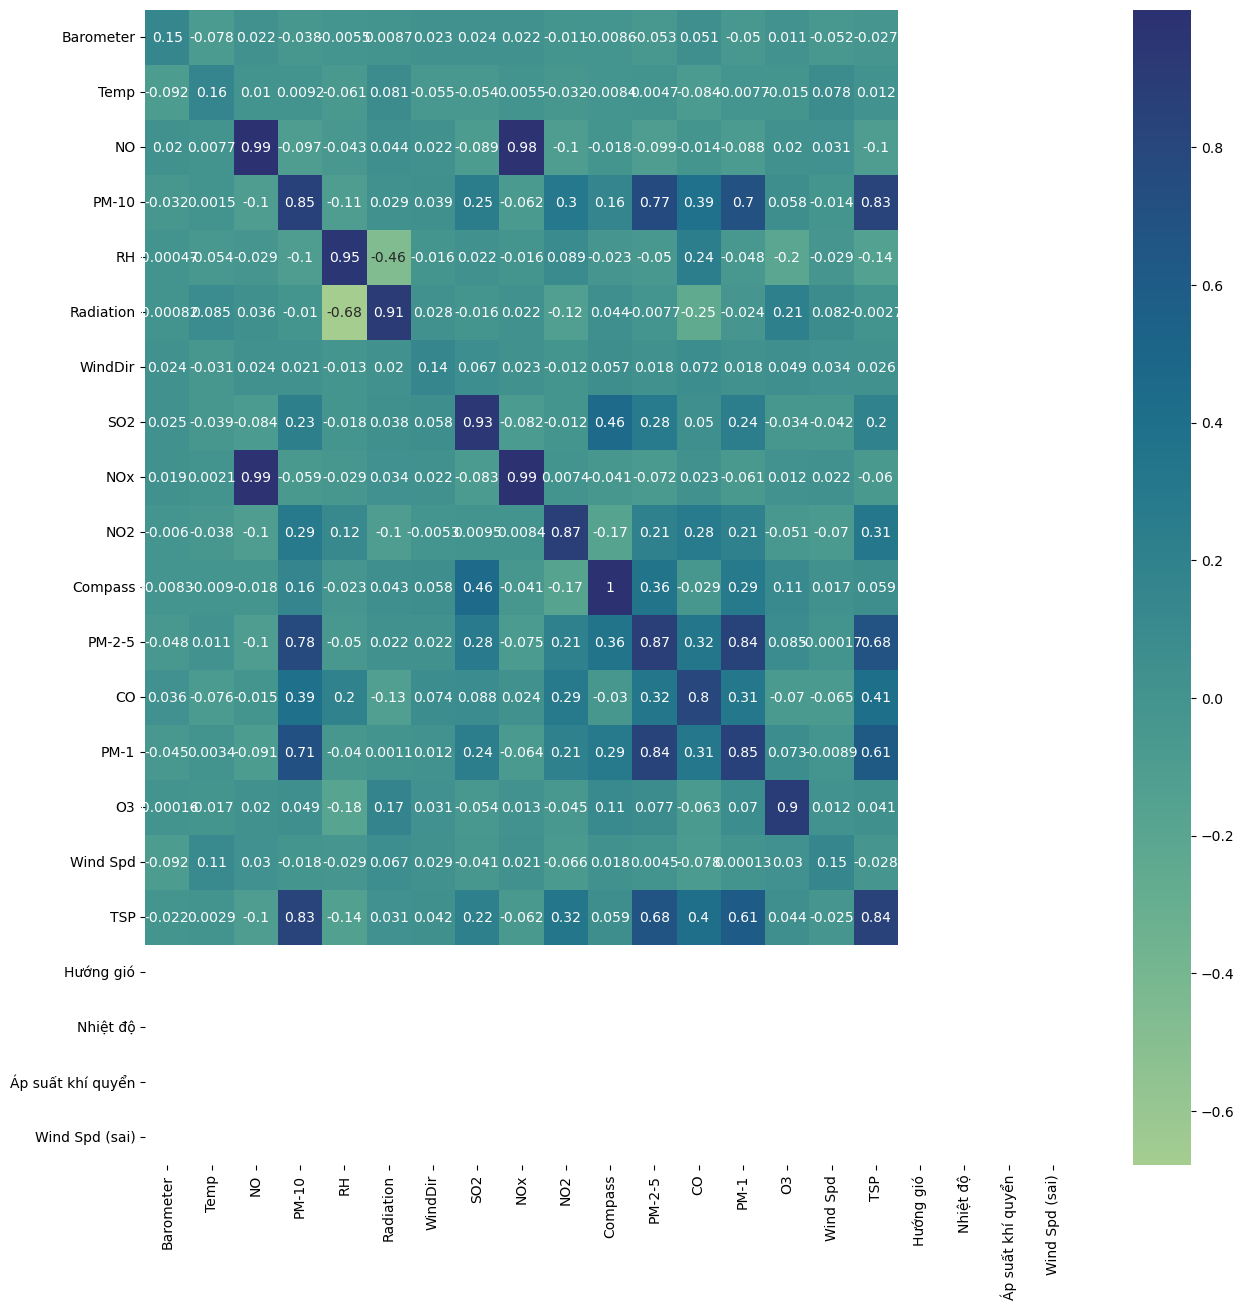

In [36]:
crossCorr3D = CrossCorr3DMatrix(dataFrame)
labels = dataFrame.columns.values
lag = 1
df = pd.DataFrame(crossCorr3D[:,:,lag], index = labels, columns=labels)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df, cmap="crest",ax = ax)
